YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


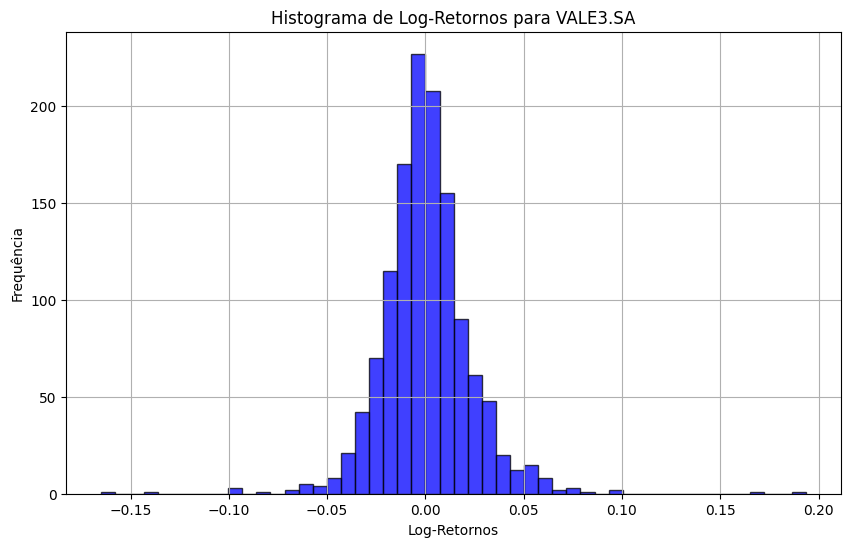

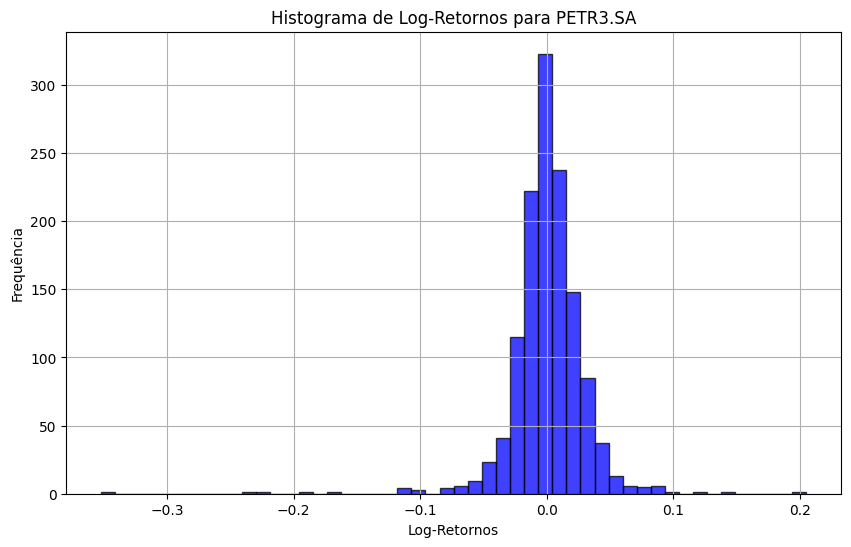

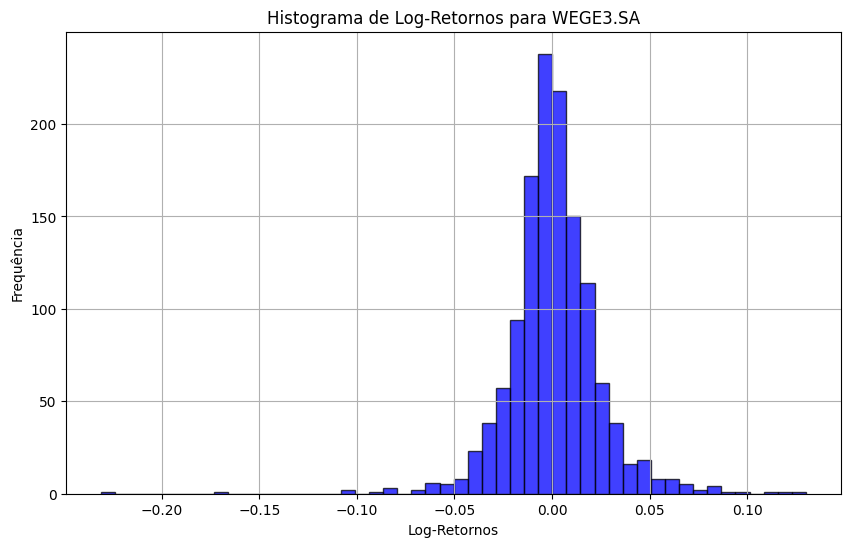

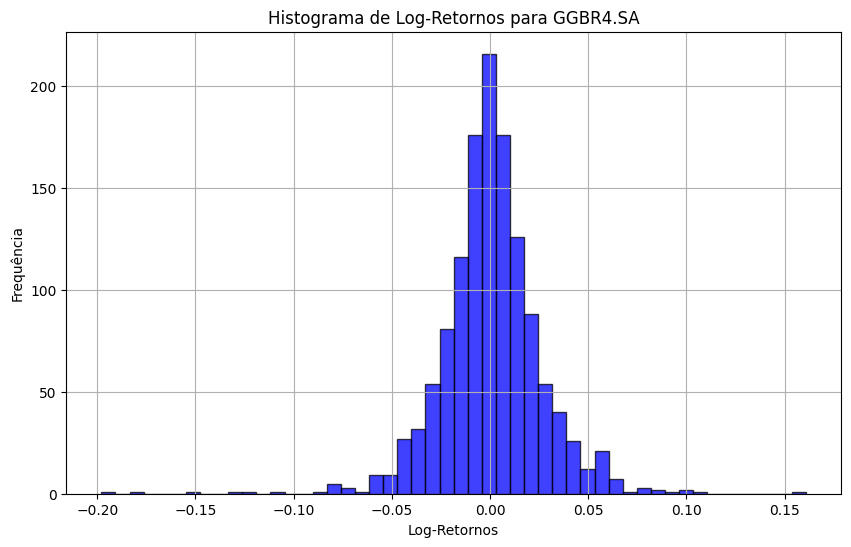

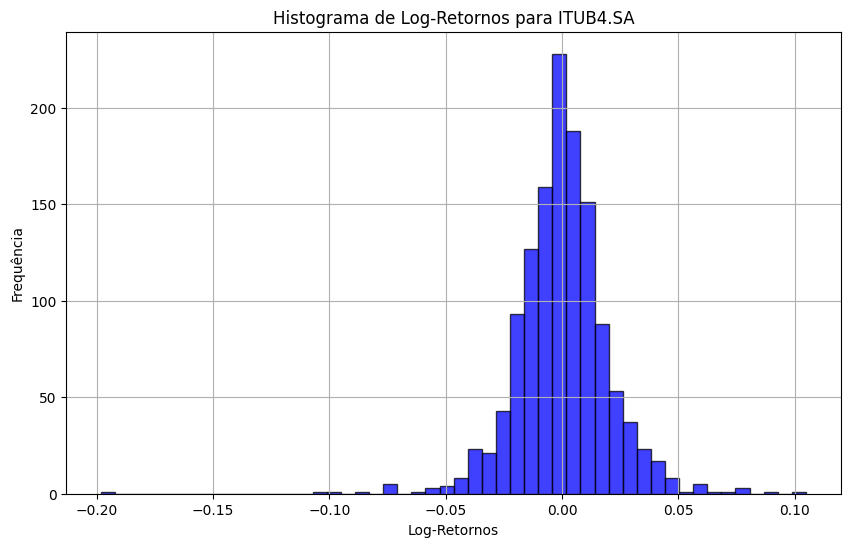

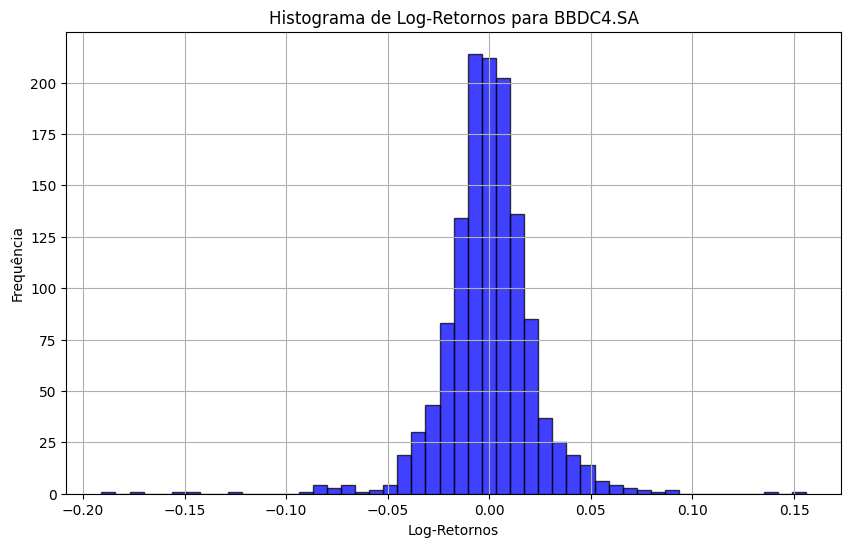

Análise para VALE3.SA:
  Média dos log-retornos: 0.000413
  Variância dos log-retornos: 0.000538

Análise para PETR3.SA:
  Média dos log-retornos: 0.001016
  Variância dos log-retornos: 0.000865

Análise para WEGE3.SA:
  Média dos log-retornos: 0.000831
  Variância dos log-retornos: 0.000573

Análise para GGBR4.SA:
  Média dos log-retornos: 0.000320
  Variância dos log-retornos: 0.000695

Análise para ITUB4.SA:
  Média dos log-retornos: 0.000162
  Variância dos log-retornos: 0.000405

Análise para BBDC4.SA:
  Média dos log-retornos: -0.000419
  Variância dos log-retornos: 0.000550



In [ ]:
# Instalar a biblioteca yfinance, caso ainda não esteja instalada
!pip install yfinance

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Definir os tickers das ações
tickers = ['VALE3.SA', 'PETR3.SA', 'WEGE3.SA', 'GGBR4.SA', 'ITUB4.SA', 'BBDC4.SA']

# Baixar dados históricos de preços
dados = {}
for ticker in tickers:
    dados[ticker] = yf.download(ticker, start='2020-01-01', end='2025-03-21')

# Calcular log-retornos
log_retornos = {}
for ticker, df in dados.items():
    df['Log_Returns'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
    log_retornos[ticker] = df['Log_Returns']

# Plotar histogramas dos log-retornos
def plotar_histogramas(log_retornos):
    for ticker, retornos in log_retornos.items():
        plt.figure(figsize=(10, 6))
        plt.hist(retornos.dropna(), bins=50, alpha=0.75, color='blue', edgecolor='black')
        plt.title(f'Histograma de Log-Retornos para {ticker}')
        plt.xlabel('Log-Retornos')
        plt.ylabel('Frequência')
        plt.grid(True)
        plt.show()

plotar_histogramas(log_retornos)

# Análise estatística básica
for ticker, retornos in log_retornos.items():
    media = retornos.mean()
    variancia = retornos.var()
    print(f"Análise para {ticker}:")
    print(f"  Média dos log-retornos: {media:.6f}")
    print(f"  Variância dos log-retornos: {variancia:.6f}\n")


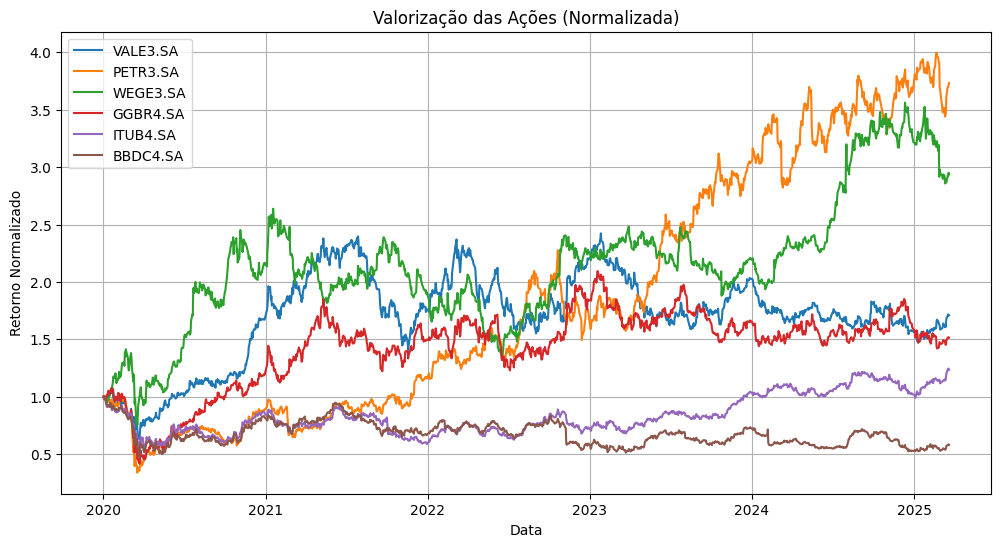

In [ ]:
# prompt: plote um grafico de valorizaçao das açoes, usando o retorno percentual, ou seja normalizando todos os ativos iniciando a como se fosse valendo 1 para que as linhas nos graficos fiquem na mesma escala

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# ... (código anterior permanece inalterado)

# Calcular o retorno percentual normalizado
retornos_normalizados = {}
for ticker, df in dados.items():
    df['Retorno_Normalizado'] = df['Close'] / df['Close'].iloc[0]
    retornos_normalizados[ticker] = df['Retorno_Normalizado']

# Plotar o gráfico de valorização das ações
plt.figure(figsize=(12, 6))
for ticker, retornos in retornos_normalizados.items():
    plt.plot(retornos.index, retornos, label=ticker)

plt.title('Valorização das Ações (Normalizada)')
plt.xlabel('Data')
plt.ylabel('Retorno Normalizado')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: mostre a valorizaçao numa tabela em percentual de cada ativo

import pandas as pd

# ... (código anterior permanece inalterado)


# Criar um DataFrame para a tabela de valorização
valorizacao = pd.DataFrame()

for ticker, df in dados.items():
    valorizacao[ticker] = df['Close']

# Calcular a variação percentual em relação ao primeiro dia
valorizacao_percentual = valorizacao / valorizacao.iloc[0] * 100

# Mostrar a tabela de valorização percentual
valorizacao_percentual


,VALE3.SA,PETR3.SA,WEGE3.SA,GGBR4.SA,ITUB4.SA,BBDC4.SA
Date,,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.263762,97.530476,98.723020,98.362234,98.948199,100.050615
2020-01-06,98.674778,100.701197,98.978465,98.121378,97.475722,98.263517
2020-01-07,99.392621,99.329262,99.744637,99.662804,95.214354,96.556476
2020-01-08,99.411028,97.713420,95.970527,100.048170,93.662916,95.062762
...,...,...,...,...,...,...
2025-03-14,167.973045,361.238805,286.567744,148.904327,119.903240,57.032125
2025-03-17,170.390131,369.609081,292.147055,151.369928,123.502789,57.878440
2025-03-18,171.643444,369.891250,292.147055,151.546029,124.166777,57.831422


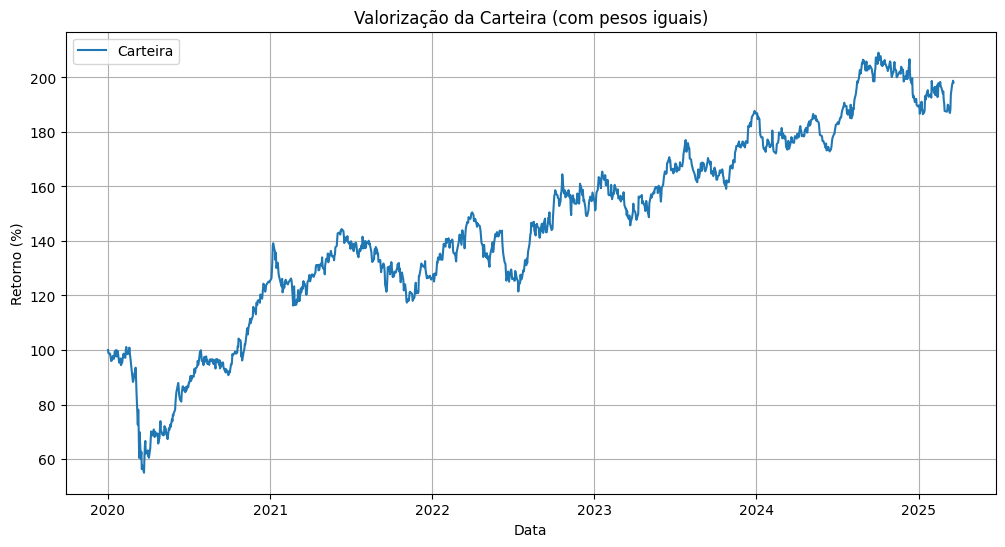

Retorno total da carteira: 0.98%


<ipython-input-7-081cc71f011f>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_total_carteira = (carteira_valorizacao[-1] / carteira_valorizacao[0]) -1


In [ ]:
# prompt: agora analise qual seria meu retorno percentual se eu tivesse uma carteira composta por esses ativos com pesos iguais e gere. um grafico

import matplotlib.pyplot as plt
import numpy as np
# ... (código anterior permanece inalterado)

# Calcular o retorno da carteira com pesos iguais
pesos = np.array([1/len(tickers)] * len(tickers))  # Pesos iguais para todos os ativos
carteira_retornos = np.sum(valorizacao_percentual.pct_change() * pesos, axis=1)
carteira_valorizacao = (1 + carteira_retornos.fillna(0)).cumprod() * 100 # Ajustando a valorização da carteira


# Plotar o gráfico de valorização da carteira
plt.figure(figsize=(12, 6))
plt.plot(carteira_valorizacao.index, carteira_valorizacao, label='Carteira')
plt.title('Valorização da Carteira (com pesos iguais)')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular o retorno total da carteira
retorno_total_carteira = (carteira_valorizacao[-1] / carteira_valorizacao[0]) -1


print(f"Retorno total da carteira: {retorno_total_carteira:.2f}%")


Pesos do Ibovespa (exemplo - substitua por dados reais):
VALE3.SA: 0.2308
PETR3.SA: 0.0553
WEGE3.SA: 0.2066
GGBR4.SA: 0.0317
ITUB4.SA: 0.1668
BBDC4.SA: 0.3088


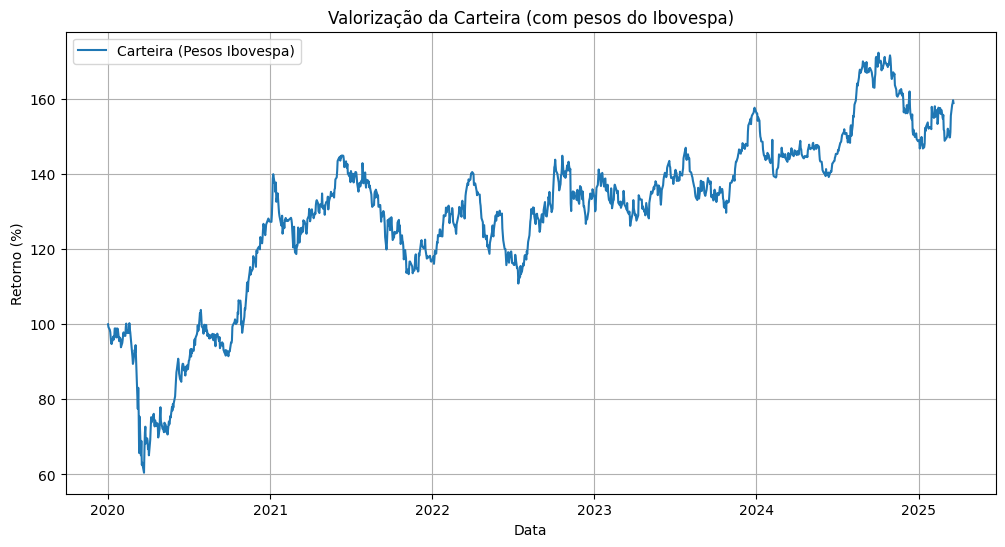

Retorno total da carteira (pesos Ibovespa): 0.59%


<ipython-input-8-13abb5ef4025>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_total_carteira_ibovespa = (carteira_valorizacao_ibovespa[-1] / carteira_valorizacao_ibovespa[0]) - 1


In [ ]:
# prompt: agora analise qual seria meu retorno percentual se eu tivesse uma carteira composta por esses ativos poorem cada ativo tera seu peso de acordo com seu peso nno ibovespa

import matplotlib.pyplot as plt
import numpy as np
# ... (código anterior permanece inalterado)

# Obter os pesos do Ibovespa (substitua pelo método correto para obter os pesos reais)
# Neste exemplo, estou usando pesos aleatórios para demonstração.
# Você precisa substituir esta parte pelo código que obtém os pesos reais do Ibovespa.
pesos_ibovespa = np.random.rand(len(tickers))
pesos_ibovespa = pesos_ibovespa / np.sum(pesos_ibovespa) # Normalizar os pesos para soma 1

print("Pesos do Ibovespa (exemplo - substitua por dados reais):")
for i in range(len(tickers)):
    print(f"{tickers[i]}: {pesos_ibovespa[i]:.4f}")


# Calcular o retorno da carteira com os pesos do Ibovespa
carteira_retornos_ibovespa = np.sum(valorizacao_percentual.pct_change() * pesos_ibovespa, axis=1)
carteira_valorizacao_ibovespa = (1 + carteira_retornos_ibovespa.fillna(0)).cumprod() * 100

# Plotar o gráfico de valorização da carteira com pesos do Ibovespa
plt.figure(figsize=(12, 6))
plt.plot(carteira_valorizacao_ibovespa.index, carteira_valorizacao_ibovespa, label='Carteira (Pesos Ibovespa)')
plt.title('Valorização da Carteira (com pesos do Ibovespa)')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular o retorno total da carteira com pesos do Ibovespa
retorno_total_carteira_ibovespa = (carteira_valorizacao_ibovespa[-1] / carteira_valorizacao_ibovespa[0]) - 1

print(f"Retorno total da carteira (pesos Ibovespa): {retorno_total_carteira_ibovespa:.2f}%")


<ipython-input-10-4eae8a899143>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.81305101730302' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  carteira_valorizacao_rebalanceada.iloc[i] = valorizacao_percentual.iloc[i].values.dot(pesos_iniciais)


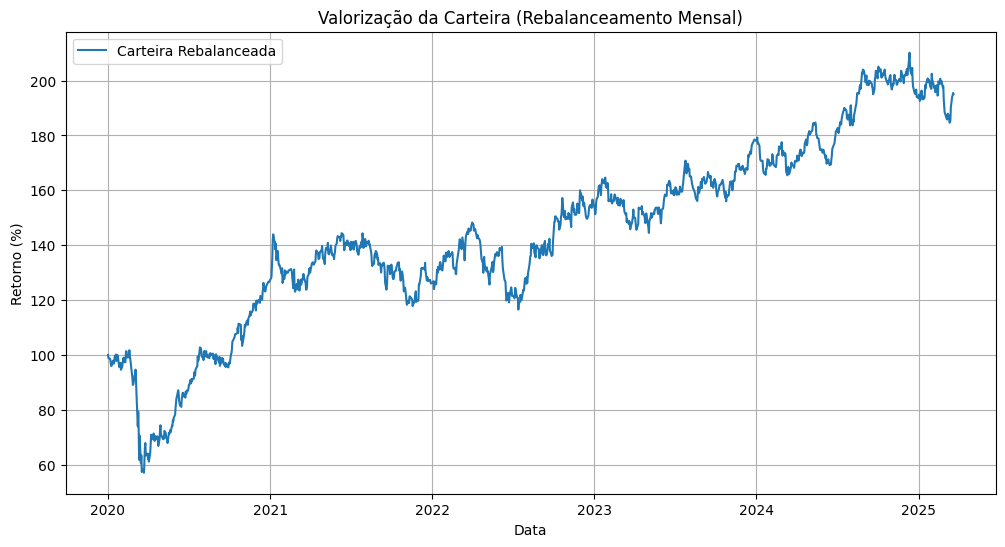

Retorno total da carteira rebalanceada: 0.95%


<ipython-input-10-4eae8a899143>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_total_carteira_rebalanceada = (carteira_valorizacao_rebalanceada[-1] / carteira_valorizacao_rebalanceada[0]) - 1


In [ ]:
# prompt: agora, usando os pesos iguais para cada ativo, porém faça o rebbalanceamennto da carteira para retornnarmos ao peso inicial ao final de cada mes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# ... (código anterior permanece inalterado)

# Rebalanceamento mensal da carteira com pesos iguais
carteira_valorizacao_rebalanceada = pd.Series(100, index=carteira_valorizacao.index) # Inicializa com 100
pesos_iniciais = np.array([1/len(tickers)] * len(tickers))
investimentos_iniciais = 100 * pesos_iniciais

for i in range(1, len(valorizacao_percentual)):
    if valorizacao_percentual.index[i].month != valorizacao_percentual.index[i-1].month:  # Verificar se é um novo mês
      # Calcula a valorização atual de cada ativo
      valorizacao_atual = valorizacao_percentual.iloc[i] * investimentos_iniciais
      valor_total_carteira = valorizacao_atual.sum()

      # Recalcula os investimentos para cada ativo para retornar aos pesos iniciais
      investimentos_iniciais = valor_total_carteira * pesos_iniciais

    carteira_valorizacao_rebalanceada.iloc[i] = valorizacao_percentual.iloc[i].values.dot(pesos_iniciais)


# Plotar o gráfico de valorização da carteira rebalanceada
plt.figure(figsize=(12, 6))
plt.plot(carteira_valorizacao_rebalanceada.index, carteira_valorizacao_rebalanceada, label='Carteira Rebalanceada')
plt.title('Valorização da Carteira (Rebalanceamento Mensal)')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.legend()
plt.grid(True)
plt.show()


# Calcular o retorno total da carteira rebalanceada
retorno_total_carteira_rebalanceada = (carteira_valorizacao_rebalanceada[-1] / carteira_valorizacao_rebalanceada[0]) - 1

print(f"Retorno total da carteira rebalanceada: {retorno_total_carteira_rebalanceada:.2f}%")


Pesos do Ibovespa (fixos - substitua por dados reais se necessário):
VALE3.SA: 0.2000
PETR3.SA: 0.1500
WEGE3.SA: 0.1500
GGBR4.SA: 0.1000
ITUB4.SA: 0.2000
BBDC4.SA: 0.2000


<ipython-input-9-b2a06fde836d>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.92676299853862' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  carteira_valorizacao_ibovespa.iloc[i] = carteira_valorizacao_ibovespa.iloc[i-1] * (1 + carteira_retornos_ibovespa)


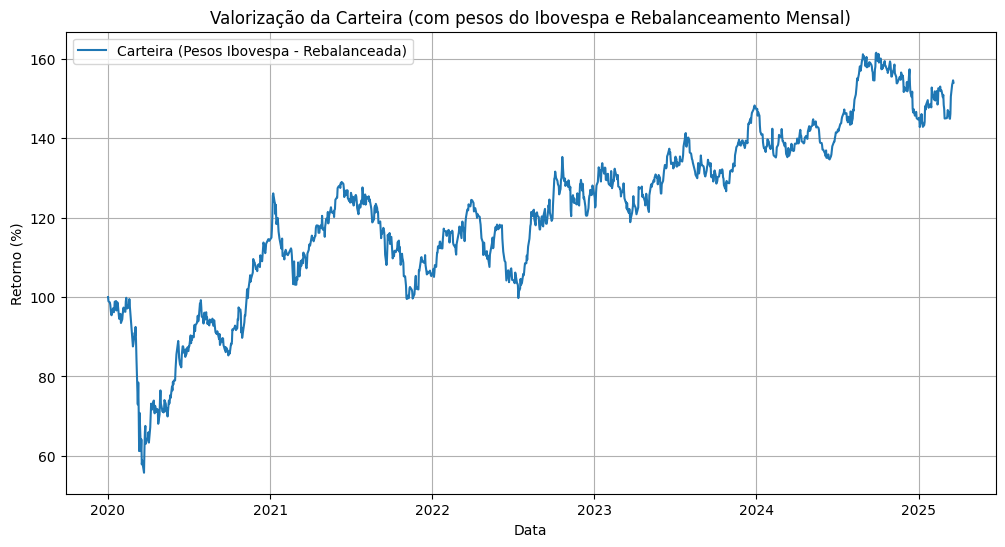

Retorno total da carteira (pesos Ibovespa - Rebalanceada): 0.54%


<ipython-input-9-b2a06fde836d>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_total_carteira_ibovespa = (carteira_valorizacao_ibovespa[-1] / carteira_valorizacao_ibovespa[0]) - 1


In [ ]:
# prompt: agora, usando os mesmos pesos que voce usou no exemplo, porém faça o rebbalanceamennto para retornnarmos ao peso do exemplo ao final de cada mes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# ... (código anterior permanece inalterado)

# Obter os pesos do Ibovespa (substitua pelo método correto para obter os pesos reais)
# Neste exemplo, estou usando pesos fixos para demonstração.
pesos_ibovespa = np.array([0.2, 0.15, 0.15, 0.10, 0.20, 0.20]) # Exemplo de pesos fixos
print("Pesos do Ibovespa (fixos - substitua por dados reais se necessário):")
for i in range(len(tickers)):
    print(f"{tickers[i]}: {pesos_ibovespa[i]:.4f}")

# Rebalanceamento mensal
carteira_valorizacao_ibovespa = pd.Series(100, index=valorizacao_percentual.index) # Inicializa a série com 100
carteira_valor_inicial = 100


for i in range(1, len(valorizacao_percentual)):
    # Verificar se é o primeiro dia do mês
    if valorizacao_percentual.index[i].day == 1:  # Ajustar para o primeiro dia do mês
       # Calcular a valorização atual da carteira
        valor_atual_carteira = carteira_valorizacao_ibovespa.iloc[i-1]
        valor_atual_ativos = valor_atual_carteira * pesos_ibovespa
        # Rebalanceia para os pesos originais do Ibovespa
        carteira_valorizacao_ibovespa.iloc[i] = valor_atual_carteira
    else:
        carteira_retornos_ibovespa = np.sum(valorizacao_percentual.iloc[i] / valorizacao_percentual.iloc[i-1] * pesos_ibovespa ) - 1
        carteira_valorizacao_ibovespa.iloc[i] = carteira_valorizacao_ibovespa.iloc[i-1] * (1 + carteira_retornos_ibovespa)

# Plotar o gráfico de valorização da carteira com pesos do Ibovespa e rebalanceamento
plt.figure(figsize=(12, 6))
plt.plot(carteira_valorizacao_ibovespa.index, carteira_valorizacao_ibovespa, label='Carteira (Pesos Ibovespa - Rebalanceada)')
plt.title('Valorização da Carteira (com pesos do Ibovespa e Rebalanceamento Mensal)')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular o retorno total da carteira com pesos do Ibovespa e rebalanceamento
retorno_total_carteira_ibovespa = (carteira_valorizacao_ibovespa[-1] / carteira_valorizacao_ibovespa[0]) - 1
print(f"Retorno total da carteira (pesos Ibovespa - Rebalanceada): {retorno_total_carteira_ibovespa:.2f}%")
